<a href="https://colab.research.google.com/github/af-pedro/The-winter-is-coming-Analyzing-the-Power-Plants-in-Germany/blob/main/Power_Plants_Data_DE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading files**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Define the path to the CSV file
csv_file_path = '/content/conventional_power_plants_DE.csv'

# Read the CSV file using pandas
de_df = pd.read_csv(csv_file_path)

In [14]:
de_df.head()

,id,name_bnetza,block_bnetza,name_uba,company,street,postcode,city,state,country,...,efficiency_estimate,energy_source_level_1,energy_source_level_2,energy_source_level_3,eeg,network_node,voltage,network_operator,merge_comment,comment
0,BNA0012a,Werkskraftwerk Sappi Alfeld,Turbine 5,NaN,Sappi Alfeld GmbH,Mühlenmarsch 1,31061,Alfeld,Niedersachsen,DE,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,Mittelspannung (MS),Überlandwerk Leinetal GmbH,NaN,NaN
1,BNA0021,HKW Altenstadt,NaN,NaN,Heizkraftwerk Altenstadt GmbH & Co. KG,Triebstraße 90,86972,Altenstadt,Bayern,DE,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,Mittelspannung (MS),LEW Verteilnetz GmbH,NaN,NaN
2,BNA0027,Zellstoff Stendal GmbH,-,Arneburg,Zellstoff Stendal GmbH,Goldbecker Straße 1,39596,Arneburg,Sachsen-Anhalt,DE,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,DE0075603959600000E00000000013559 DE0075603959...,USp. Mittel- / Niederspannung (MS/NS),Infrastrukturbetrieb der Stadt Arneburg,List matching type: Single UBA power plant ass...,NaN
3,BNA0055,UTB,NaN,NaN,Pfleiderer Baruth GmbH,An der Birkenpfuhlheide 3,15837,Baruth/Mark,Brandenburg,DE,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,UTB/Eon-edis,Mittelspannung (MS),E.DIS AG,NaN,NaN
4,BNA0062,BHW Beeskow,NaN,NaN,Sonae Arauco Beeskow GmbH,NaN,15848,Beeskow,Brandenburg,DE,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,Umspannwerk Beeskow der E.DIS AG,Hochspannung (HS),E.DIS AG,NaN,NaN


In [15]:
# Filter rows where the "country" column is equal to "DE"
de_df = de_df[de_df['country'] == 'DE']

de_df.head()

,id,name_bnetza,block_bnetza,name_uba,company,street,postcode,city,state,country,...,efficiency_estimate,energy_source_level_1,energy_source_level_2,energy_source_level_3,eeg,network_node,voltage,network_operator,merge_comment,comment
0,BNA0012a,Werkskraftwerk Sappi Alfeld,Turbine 5,NaN,Sappi Alfeld GmbH,Mühlenmarsch 1,31061,Alfeld,Niedersachsen,DE,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,Mittelspannung (MS),Überlandwerk Leinetal GmbH,NaN,NaN
1,BNA0021,HKW Altenstadt,NaN,NaN,Heizkraftwerk Altenstadt GmbH & Co. KG,Triebstraße 90,86972,Altenstadt,Bayern,DE,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,Mittelspannung (MS),LEW Verteilnetz GmbH,NaN,NaN
2,BNA0027,Zellstoff Stendal GmbH,-,Arneburg,Zellstoff Stendal GmbH,Goldbecker Straße 1,39596,Arneburg,Sachsen-Anhalt,DE,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,DE0075603959600000E00000000013559 DE0075603959...,USp. Mittel- / Niederspannung (MS/NS),Infrastrukturbetrieb der Stadt Arneburg,List matching type: Single UBA power plant ass...,NaN
3,BNA0055,UTB,NaN,NaN,Pfleiderer Baruth GmbH,An der Birkenpfuhlheide 3,15837,Baruth/Mark,Brandenburg,DE,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,UTB/Eon-edis,Mittelspannung (MS),E.DIS AG,NaN,NaN
4,BNA0062,BHW Beeskow,NaN,NaN,Sonae Arauco Beeskow GmbH,NaN,15848,Beeskow,Brandenburg,DE,...,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,Umspannwerk Beeskow der E.DIS AG,Hochspannung (HS),E.DIS AG,NaN,NaN


In [16]:
# Display information about the DataFrame
print("\nDataFrame Information:")
print(de_df.info())


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, 0 to 908
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     879 non-null    object 
 1   name_bnetza            879 non-null    object 
 2   block_bnetza           655 non-null    object 
 3   name_uba               269 non-null    object 
 4   company                879 non-null    object 
 5   street                 521 non-null    object 
 6   postcode               878 non-null    object 
 7   city                   878 non-null    object 
 8   state                  879 non-null    object 
 9   country                879 non-null    object 
 10  capacity_net_bnetza    858 non-null    float64
 11  capacity_gross_uba     260 non-null    float64
 12  energy_source          879 non-null    object 
 13  technology             879 non-null    object 
 14  chp                    877 non-null    

In [17]:
# Display descriptive statistics of the DataFrame
print("\nDescriptive Statistics of the DataFrame:")
print(de_df.describe())



Descriptive Statistics of the DataFrame:
       capacity_net_bnetza  capacity_gross_uba  commissioned     retrofit  \
count           858.000000          260.000000    852.000000    59.000000   
mean            134.186556          311.137692   1985.025822  2002.949153   
std             227.709509          309.092119     22.115163    13.024412   
min               0.000000           11.757960   1905.000000  1948.000000   
25%              16.425000          100.334823   1971.000000  1996.000000   
50%              38.400000          175.000000   1988.000000  2005.000000   
75%             125.000000          425.000000   2003.000000  2010.500000   
max            1410.000000         1485.000000   2019.000000  2020.000000   

          shutdown         lat         lon  efficiency_data  \
count   110.000000  879.000000  879.000000       135.000000   
mean   2015.163636   50.709323    9.650427         0.440441   
std       2.495968    1.706090    2.313800         0.117905   
min    2011.

In [18]:
# Descriptive statistics for categorical columns
print("\nCount of unique values for categorical columns:")
for column in de_df.select_dtypes(include=['object']).columns:
    print(f"\nColumn: {column}")
    print(de_df[column].value_counts())



Count of unique values for categorical columns:

Column: id
id
BNA0083     2
BNA0085b    2
BNA0012a    1
BNA1292b    1
BNA1127     1
           ..
BNA1267     1
BNA1269     1
BNA1273     1
BNA1274     1
BNA1865     1
Name: count, Length: 877, dtype: int64

Column: name_bnetza
name_bnetza
Frimmersdorf    13
Niederaußem      9
Gersteinwerk     9
Hohenwarte 2     8
Thyrow           8
                ..
Trier            1
Uppenborn 2      1
Tannheim         1
Mühltal          1
Turbine 5        1
Name: count, Length: 591, dtype: int64

Column: block_bnetza
block_bnetza
1                         16
B                         13
GuD                       11
2                         11
C                          9
                          ..
Wasserkraft                1
Unterbergen                1
Scheuring                  1
Schwabstadl                1
Gasmotorenanlage Fenne     1
Name: count, Length: 447, dtype: int64

Column: name_uba
name_uba
Hohenwarte II  A bis H                8
St

In [20]:
# Check for missing values in the DataFrame
print("\nMissing values by column:")
print(de_df.isnull().sum())



Missing values by column:
id                         0
name_bnetza                0
block_bnetza             224
name_uba                 610
company                    0
street                   358
postcode                   1
city                       1
state                      0
country                    0
capacity_net_bnetza       21
capacity_gross_uba       619
energy_source              0
technology                 0
chp                        2
chp_capacity_uba         718
commissioned              27
commissioned_original     27
retrofit                 820
shutdown                 769
status                     0
type                     791
lat                        0
lon                        0
eic_code_plant           693
eic_code_block           696
efficiency_data          744
efficiency_source        749
efficiency_estimate       77
energy_source_level_1      4
energy_source_level_2     13
energy_source_level_3    833
eeg                        0
network_node    

In [21]:
# Age of power plants
de_df['age'] = 2024 - de_df['commissioned']
average_age = de_df['age'].mean()

print(f'Average Age of Power Plants: {average_age:.2f} years')

Average Age of Power Plants: 38.97 years


In [112]:
# Age of power plants
de_df['age_retrofit'] = 2024 - de_df['retrofit']
average_age = de_df['age_retrofit'].mean()

print(f'Average Age retrofit of Power Plants: {average_age:.2f} years')

Average Age retrofit of Power Plants: 21.05 years


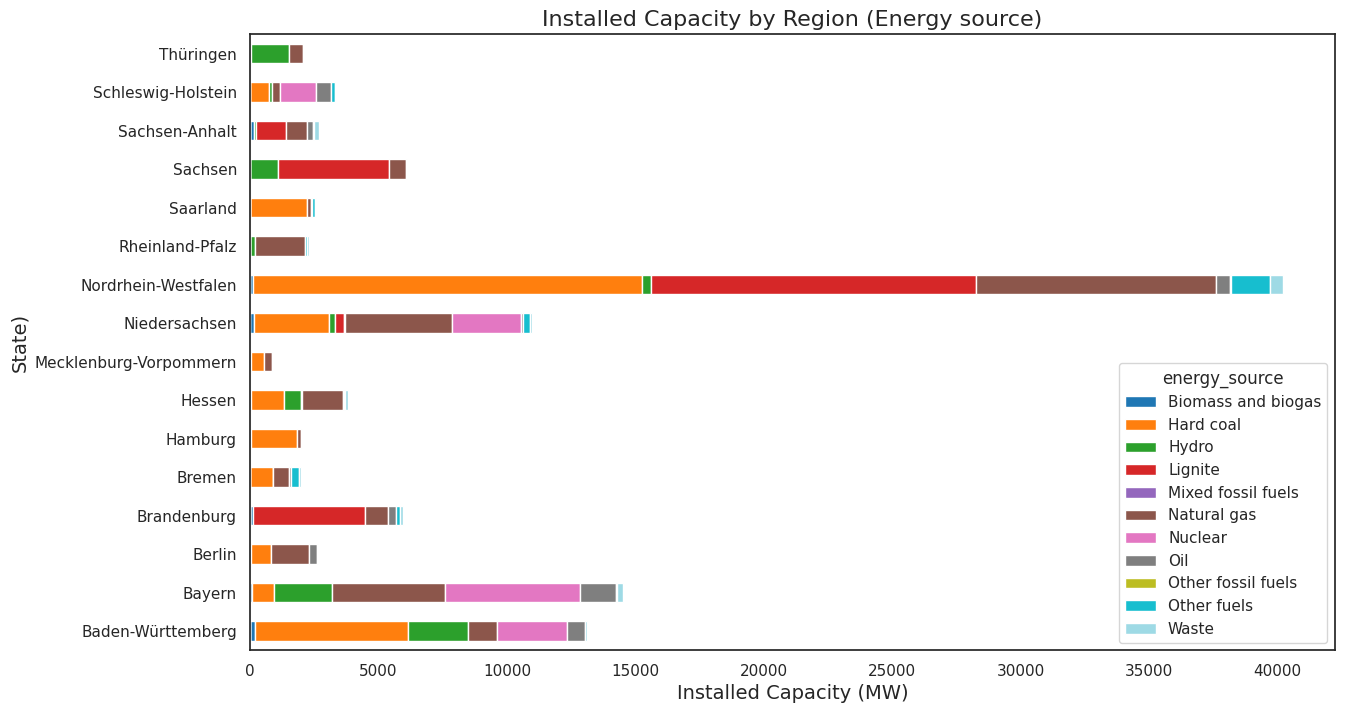

In [129]:
# Aggregate capacity by region and energy source
capacity_by_region = de_df.groupby(['state', 'energy_source'])['capacity_net_bnetza'].sum().unstack().fillna(0)

# Plotting the stacked bar chart
capacity_by_region.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='tab20')

# Adding title and labels
plt.title('Installed Capacity by Region (Energy Source)', fontsize=16)
plt.xlabel('Installed Capacity (MW)', fontsize=14)
plt.ylabel('State', fontsize=14)

# Display the plot
plt.show()

In [127]:
# Group by state, technology, and energy source type, and count the power plants
power_plants_table = de_df.groupby(['state', 'technology', 'energy_source']).size().unstack(fill_value=0)

# Display the table
print(power_plants_table)

energy_source                            Biomass and biogas  Hard coal  Hydro  \
state              technology                                                   
Baden-Württemberg  Combined cycle                         0          0      0   
                   Combustion Engine                      0          0      0   
                   Gas turbine                            0          0      0   
                   Pumped storage                         0          0      7   
                   Run-of-river                           0          0     12   
...                                                     ...        ...    ...   
Schleswig-Holstein Steam turbine                          0          5      0   
                   Storage technologies                   0          0      0   
Thüringen          Combined cycle                         0          0      0   
                   Pumped storage                         0          0     16   
                   Steam tur

In [48]:
# Set ggplot-like style
sns.set(style='darkgrid')

def plot_bar_with_counts(data, column, palette='viridis'):
    """
    Plots a bar chart with count values inside or at the end of the bars.

    Parameters:
    - data: The dataframe containing the data.
    - column: The column name (string) for which the bar plot will be created.
    - palette: The color palette for the plot (default is 'viridis').
    """
    # Create the plot
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index, palette=palette)

    # Add count values on the bars
    for p in ax.patches:
      ax.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,  # Position of the text
              f'{int(p.get_width())}',  # Text (count value)
              ha='left', va='center', fontsize=12)  # Alignment and font size

    # Title and labels
    title = f'Distribution of power plants by {column.replace("_", " ").title()}'  # Format title without underscores
    plt.title(title, fontsize=16)
    plt.xlabel('', fontsize=14)
    plt.ylabel(column.replace('_', ' ').title(), fontsize=14)


<ipython-input-48-7284d92b8b2c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index, palette=palette)


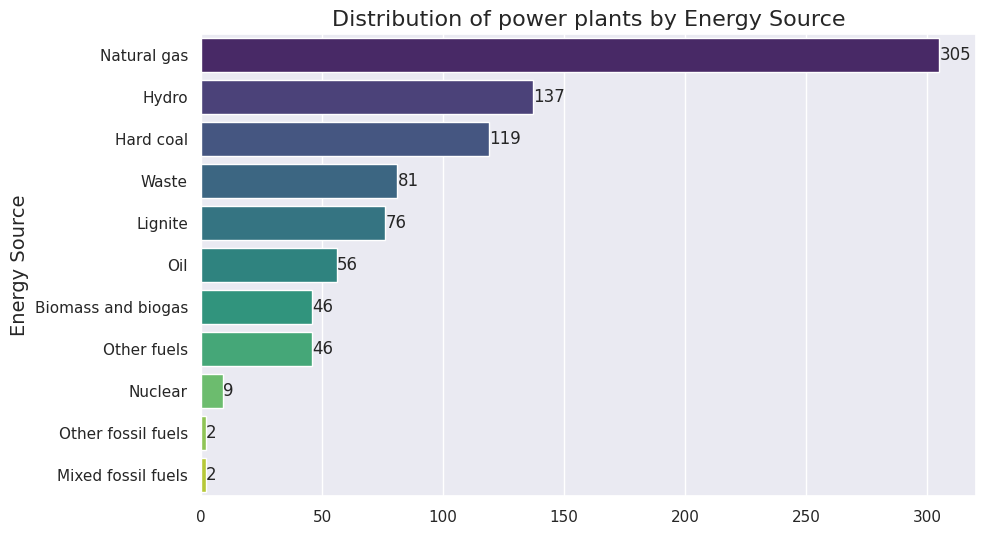

In [49]:
plot_bar_with_counts(de_df, 'energy_source')

<ipython-input-48-7284d92b8b2c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index, palette=palette)


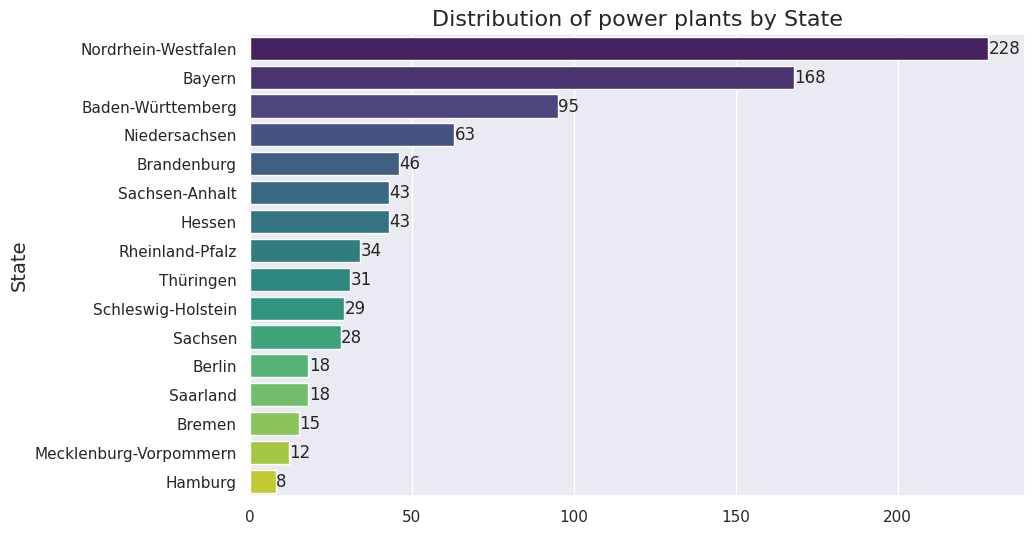

In [50]:
plot_bar_with_counts(de_df, 'state')

<ipython-input-44-2e8a9ed94946>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index, palette=palette)


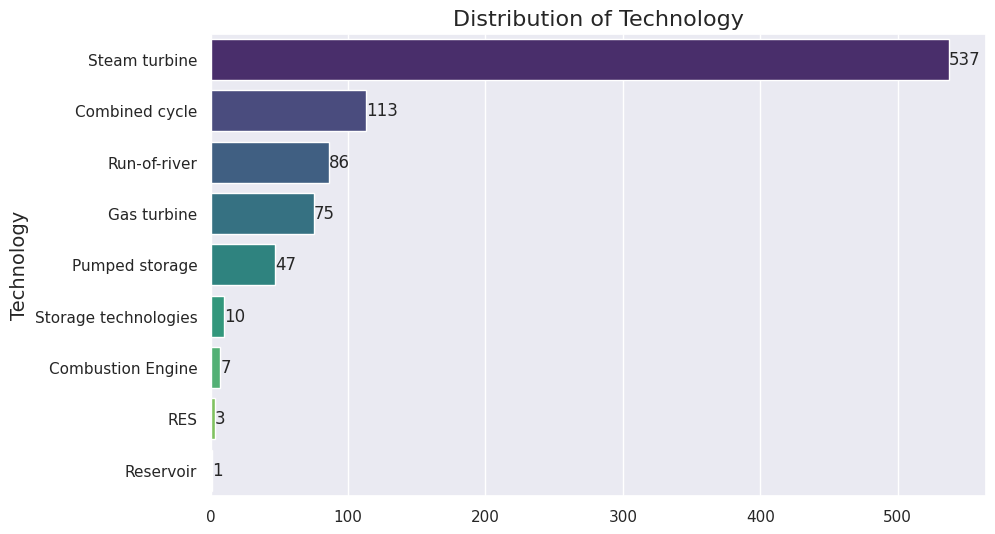

In [45]:
plot_bar_with_counts(de_df, 'technology')

<ipython-input-48-7284d92b8b2c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index, palette=palette)
<ipython-input-48-7284d92b8b2c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index, palette=palette)


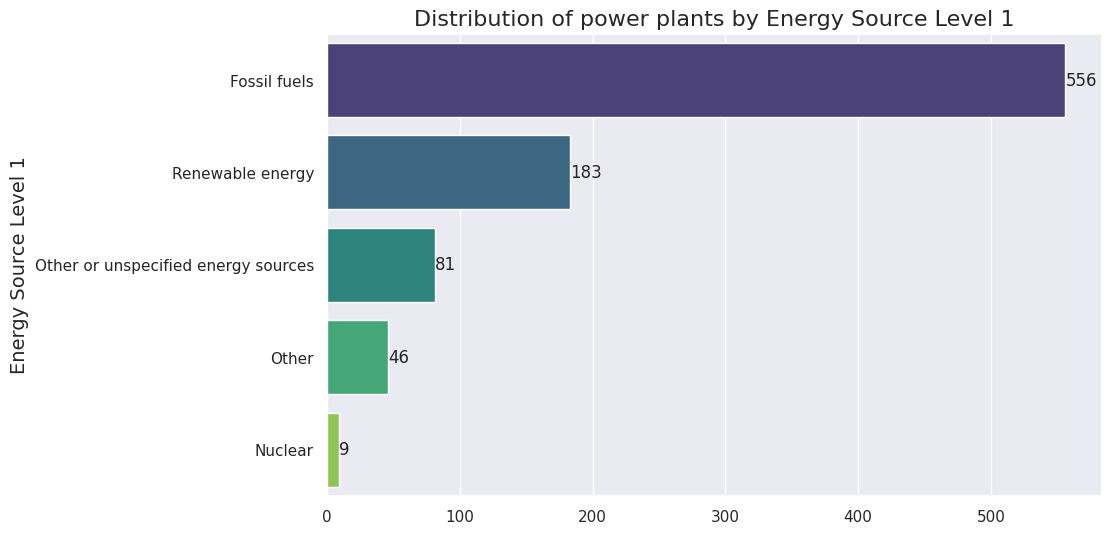

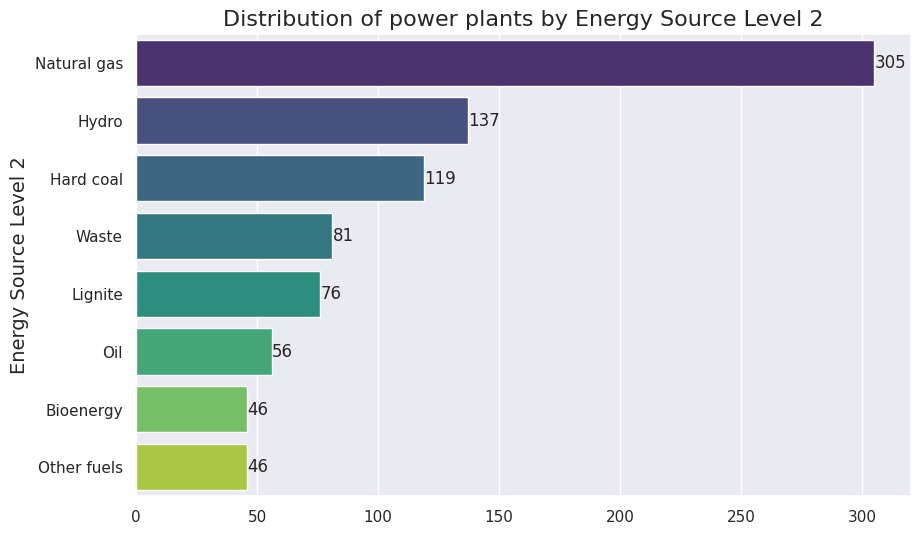

In [52]:
plot_bar_with_counts(de_df,'energy_source_level_1')

plot_bar_with_counts(de_df,'energy_source_level_2')


<ipython-input-48-7284d92b8b2c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index, palette=palette)


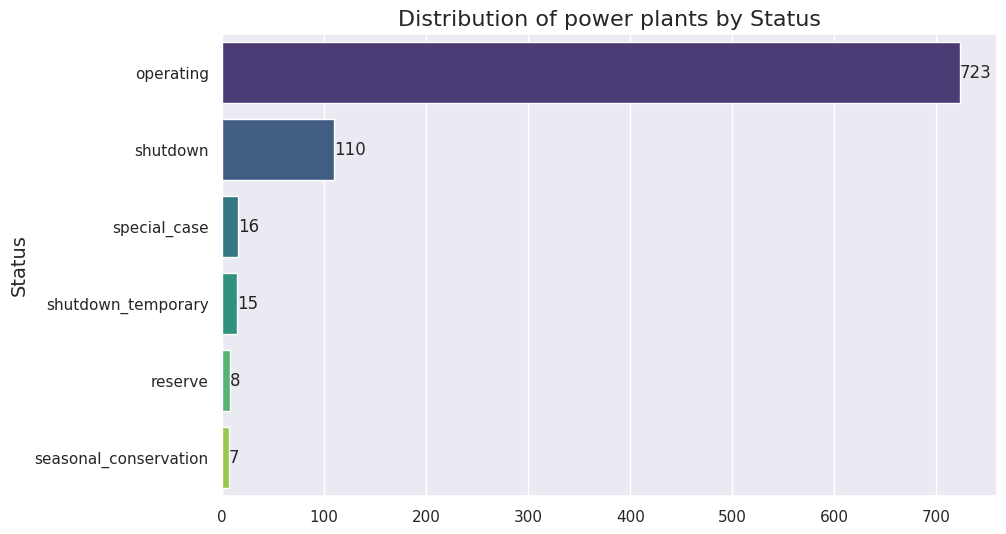

In [53]:
plot_bar_with_counts(de_df,'status')

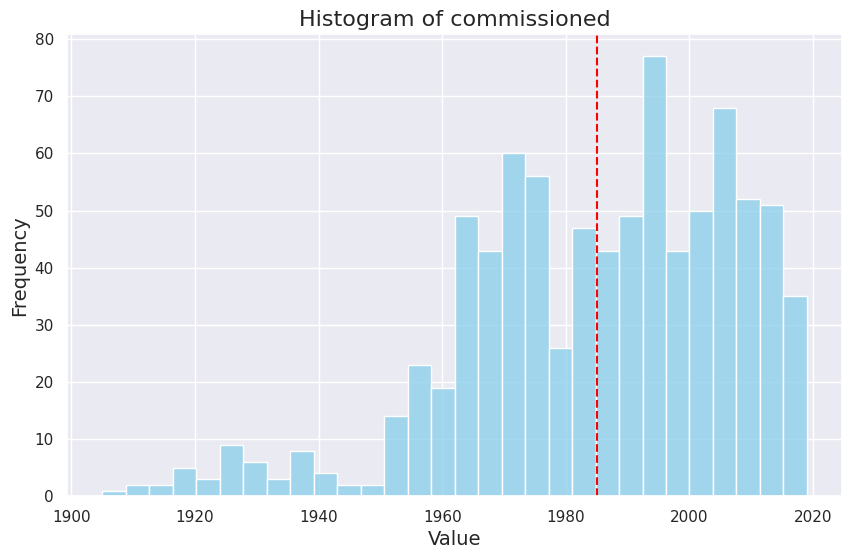

In [56]:
# Calculate the mean of the 'commissioned' column
mean_value = de_df['commissioned'].mean()

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(de_df['commissioned'], kde=False, bins=30, color='skyblue')
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean Year: {int(mean_value)}')
plt.title('Histogram of Commissioned Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()

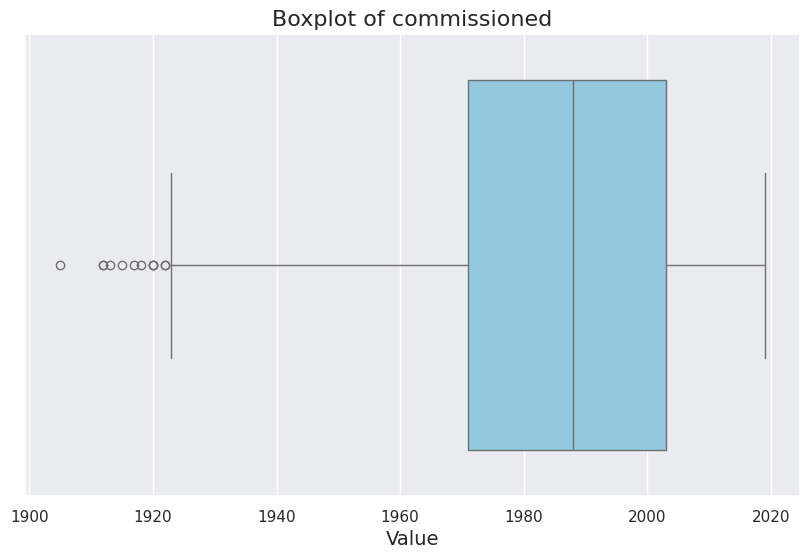

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=de_df['commissioned'], color='skyblue')
plt.title('Boxplot of commissioned', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.show()

<ipython-input-66-8a7bba2debc4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=filtered_network_operators.index, x=filtered_network_operators.values, palette='viridis')


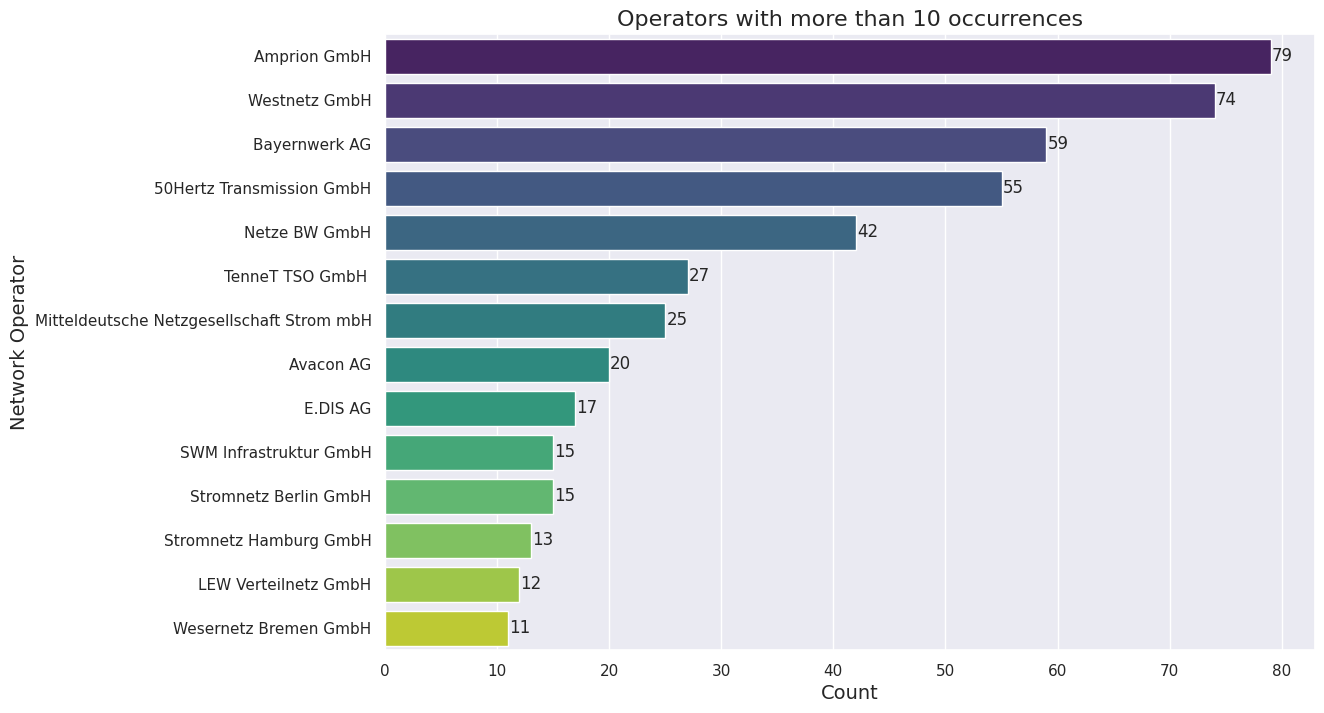

In [66]:
# Count the frequency of each network operator
network_operator_counts = de_df['network_operator'].value_counts()

# Filter only those appearing more than 10 times
filtered_network_operators = network_operator_counts[network_operator_counts > 10]

# Plot the horizontal bar chart (inverted)
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=filtered_network_operators.index, x=filtered_network_operators.values, palette='viridis')

# Add count values on the bars
for p in ax.patches:
  ax.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
  f'{int(p.get_width())}',
  ha='left', va='center', fontsize=12)

# Add title and labels
plt.title('Operators with more than 10 occurrences', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Network Operator', fontsize=14)
plt.show()

<ipython-input-67-5e720eaa200c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=filtered_network_operators.index, x=filtered_network_operators.values, palette='viridis')


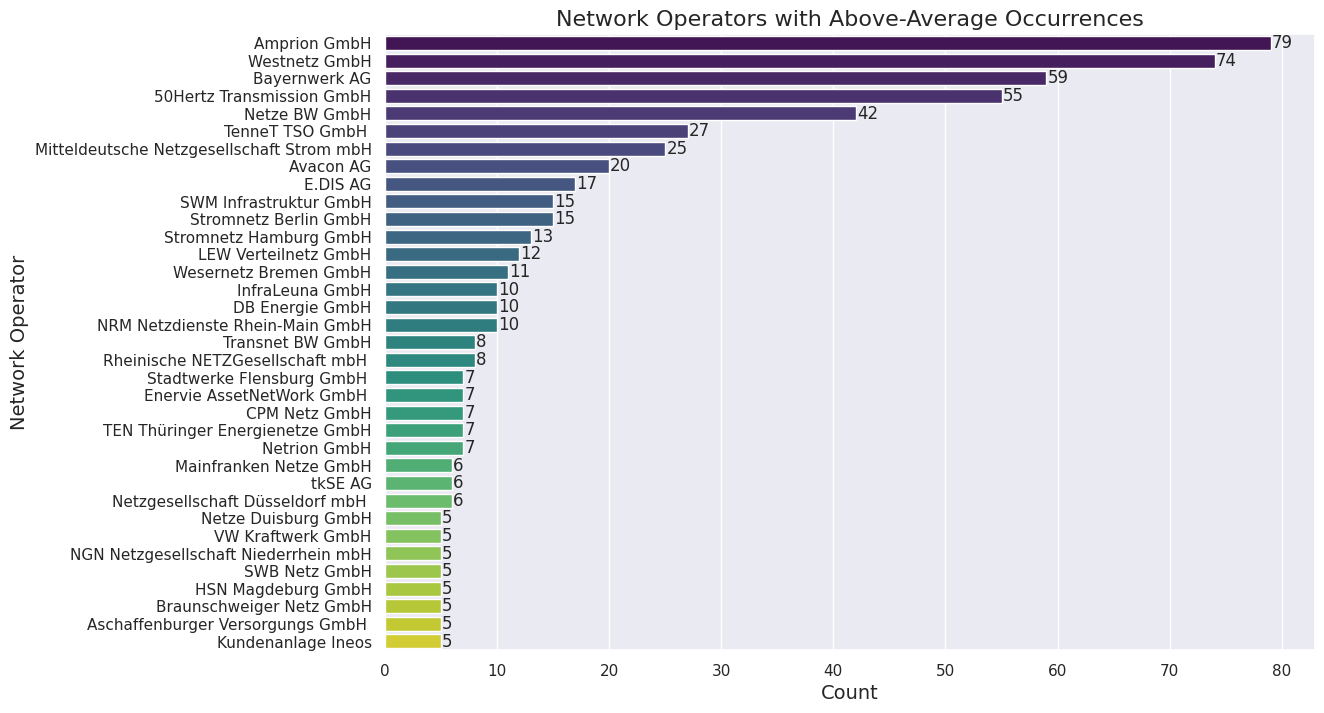

In [67]:
# Count the frequency of each network operator
network_operator_counts = de_df['network_operator'].value_counts()

# Calculate the mean occurrence
mean_occurrences = network_operator_counts.mean()

# Filter operators with occurrences above the mean
filtered_network_operators = network_operator_counts[network_operator_counts > mean_occurrences]

# Plot the inverted (horizontal) bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=filtered_network_operators.index, x=filtered_network_operators.values, palette='viridis')

# Add count values on the bars
for p in ax.patches:
  ax.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
  f'{int(p.get_width())}',
  ha='left', va='center', fontsize=12)

# Add title and labels
plt.title('Network Operators with Above-Average Occurrences', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Network Operator'


<ipython-input-77-c2cfa9f2af4e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=capacity_by_company.head(10).index, x=capacity_by_company.head(10).values, palette='viridis')


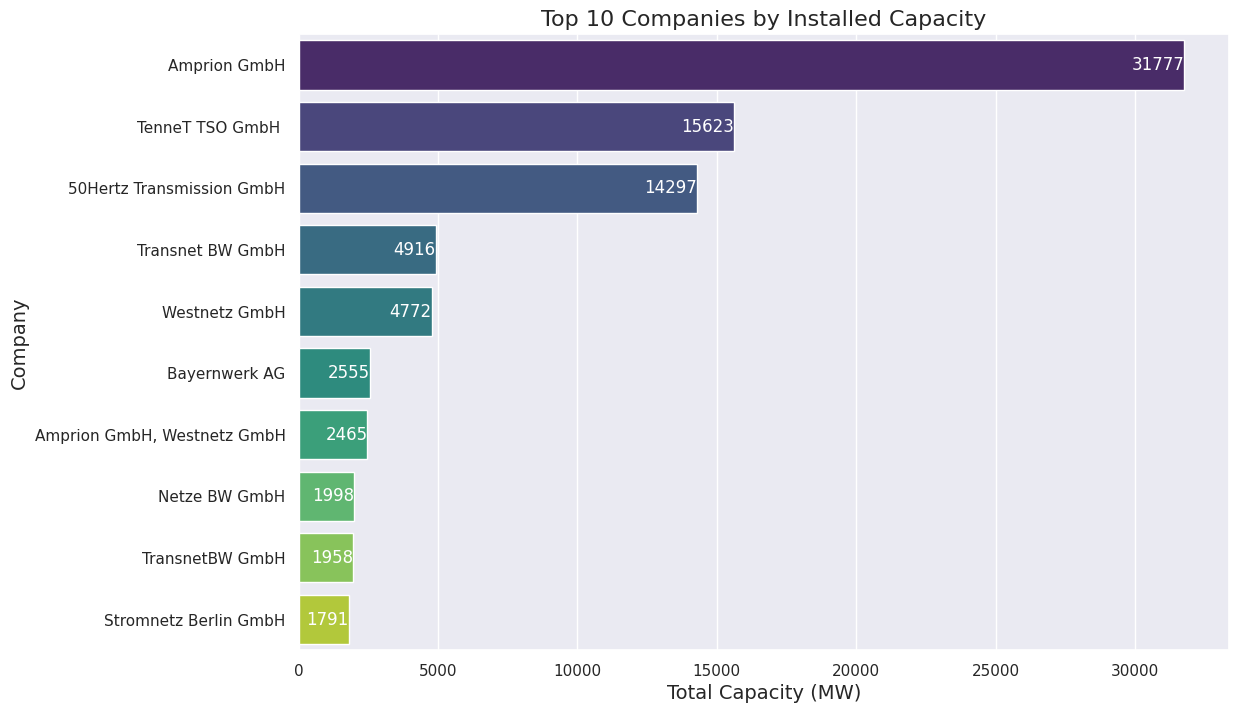

In [77]:
# Aggregate capacity by company
capacity_by_company = de_df.groupby('network_operator')['capacity_net_bnetza'].sum().sort_values(ascending=False)

# Plot horizontal bar chart with Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=capacity_by_company.head(10).index, x=capacity_by_company.head(10).values, palette='viridis')

# Add capacity values on the bars
for p in ax.patches:
  ax.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
  f'{int(p.get_width())}',
  ha='right', va='center', fontsize=12, color='white')

# Title and labels
plt.title('Top 10 Companies by Installed Capacity', fontsize=16)
plt.xlabel('Total Capacity (MW)', fontsize=14)
plt.ylabel('Company', fontsize=14)

# Display the plot
plt.show()


<ipython-input-103-1a561e909524>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  x = sns.barplot(y=filtered_network_operators.index, x=filtered_network_operators.values, palette='viridis')


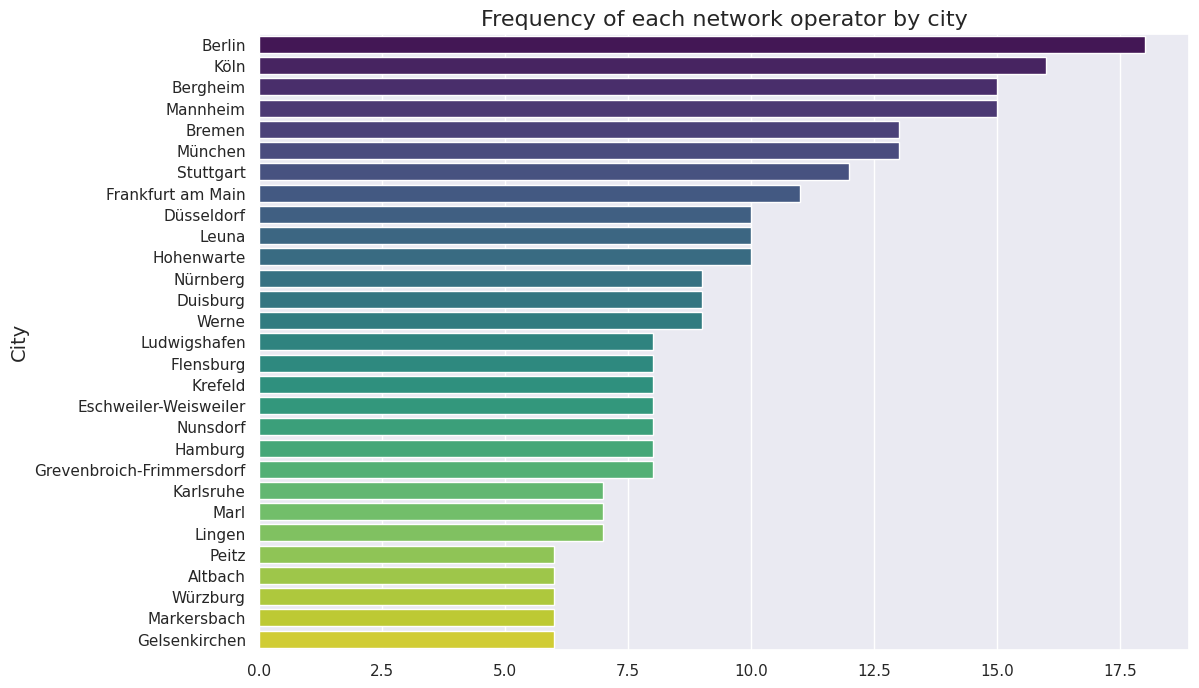

In [103]:
# Count the frequency of each network operator by city
network_operator_counts = de_df['city'].value_counts()

# Filter only those that appear more than 5 times
filtered_network_operators = network_operator_counts[network_operator_counts > 5]

# Plot horizontal bar chart (inverted)
plt.figure(figsize=(12, 8))
x = sns.barplot(y=filtered_network_operators.index, x=filtered_network_operators.values, palette='viridis')

# Add count values on the bars
for p in x.patches:
  x.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2,
  f'{int(p.get_width())}',
  ha='left', va='center', fontsize=12, color='white')

# Title and labels
plt.title('Frequency of each network operator by city', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.show()


<ipython-input-39-2438df6eec1e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=filtered_network_operators.index, x=filtered_network_operators.values, palette='viridis')


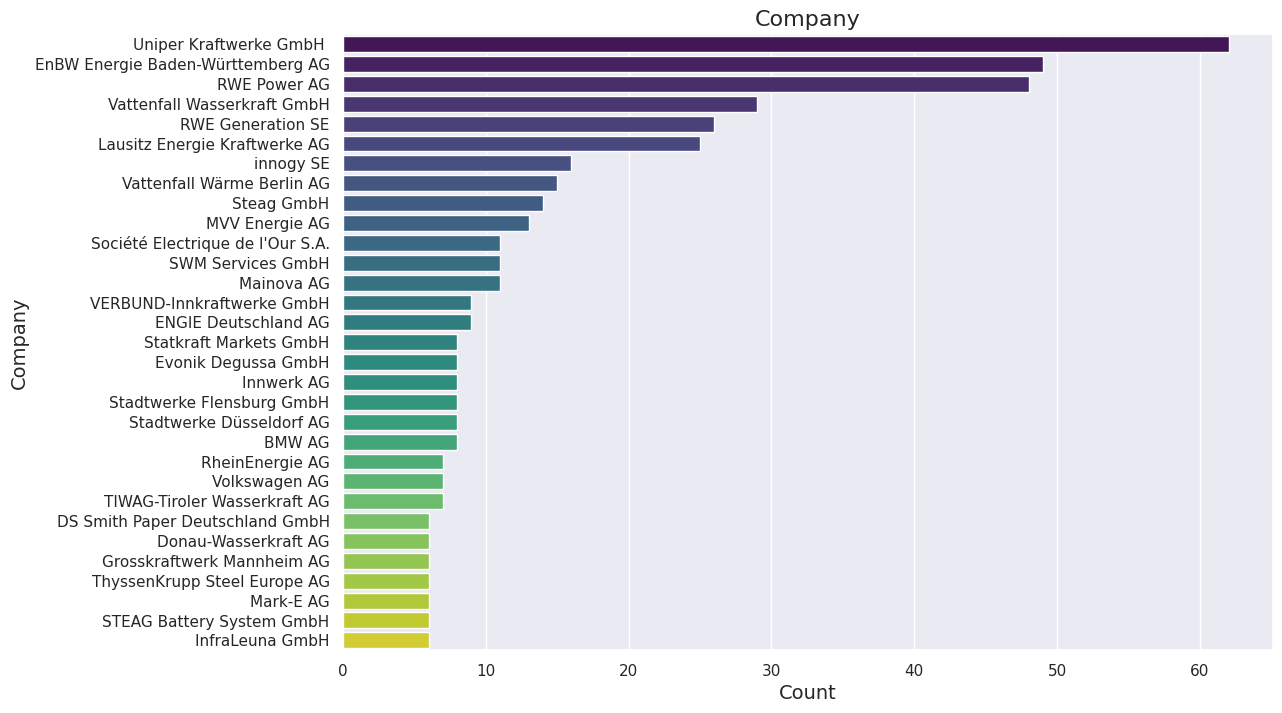

In [ ]:
# Count the frequency of each network operator
network_operator_counts = de_df['company'].value_counts()

# Filter only those that appear more than 5 times
filtered_network_operators = network_operator_counts[network_operator_counts > 5]

# Plot horizontal bar chart (inverted)
plt.figure(figsize=(12, 8))
sns.barplot(y=filtered_network_operators.index, x=filtered_network_operators.values, palette='viridis')
plt.title('Company', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Company', fontsize=14)
plt.show()

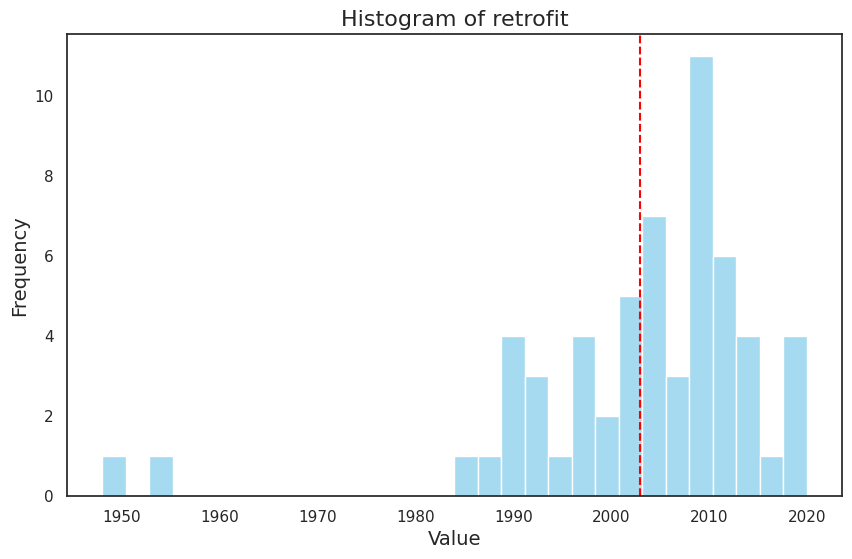

In [111]:
mean_value = de_df['retrofit'].mean()

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(de_df['retrofit'], kde=False, bins=30, color='skyblue')
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean Year: {int(mean_value)}')
plt.title('Histogram of retrofit', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

**1. What is the distribution of plant capacity by energy source type?**

<ipython-input-82-be5a892925d2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='energy_source', y='capacity_net_bnetza', data=de_df, estimator=sum, palette='viridis', order=order)


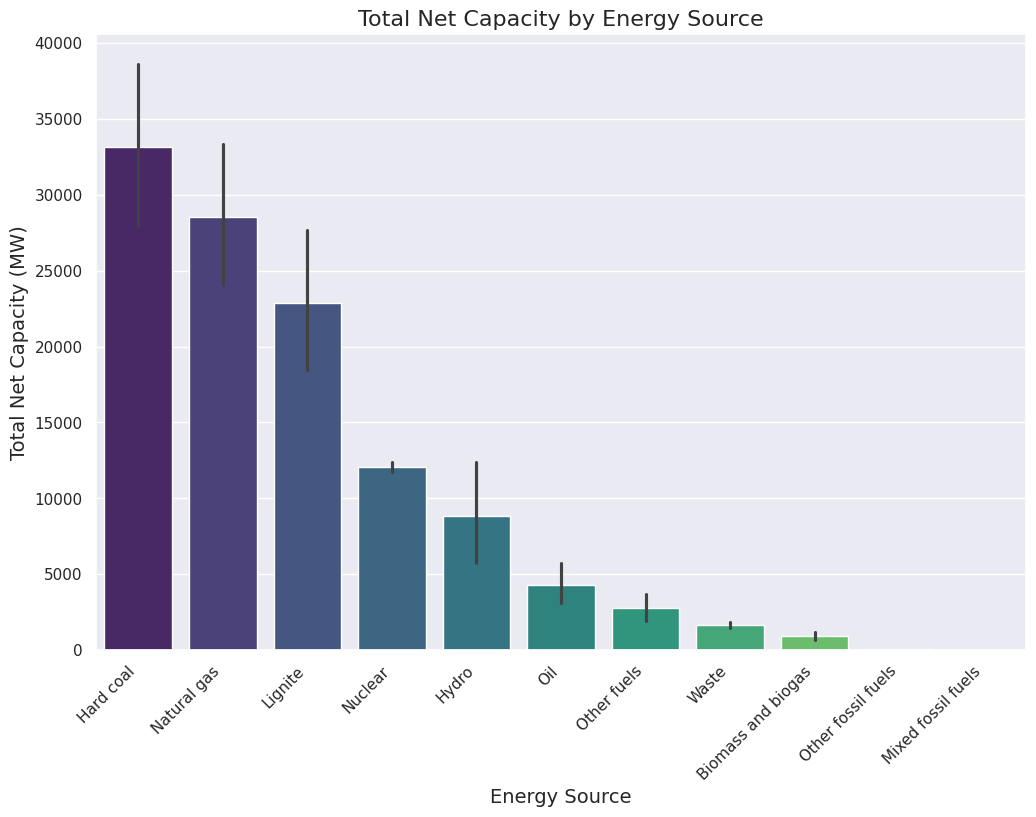

In [82]:
# Calculate the sum of capacity by energy source
order = de_df.groupby('energy_source')['capacity_net_bnetza'].sum().sort_values(ascending=False).index

# Create the chart with ordered bars
plt.figure(figsize=(12, 8))
sns.barplot(x='energy_source', y='capacity_net_bnetza', data=de_df, estimator=sum, palette='viridis', order=order)
plt.title('Total Net Capacity by Energy Source', fontsize=16)
plt.xlabel('Energy Source', fontsize=14)
plt.ylabel('Total Net Capacity (MW)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


**2. How does the gross capacity of power plants vary over the years?**

> Adicionar aspas



<ipython-input-146-f432d2bed28d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='commissioned', y='capacity_gross_uba', data=de_df, marker='o', color='blue', ci=None)


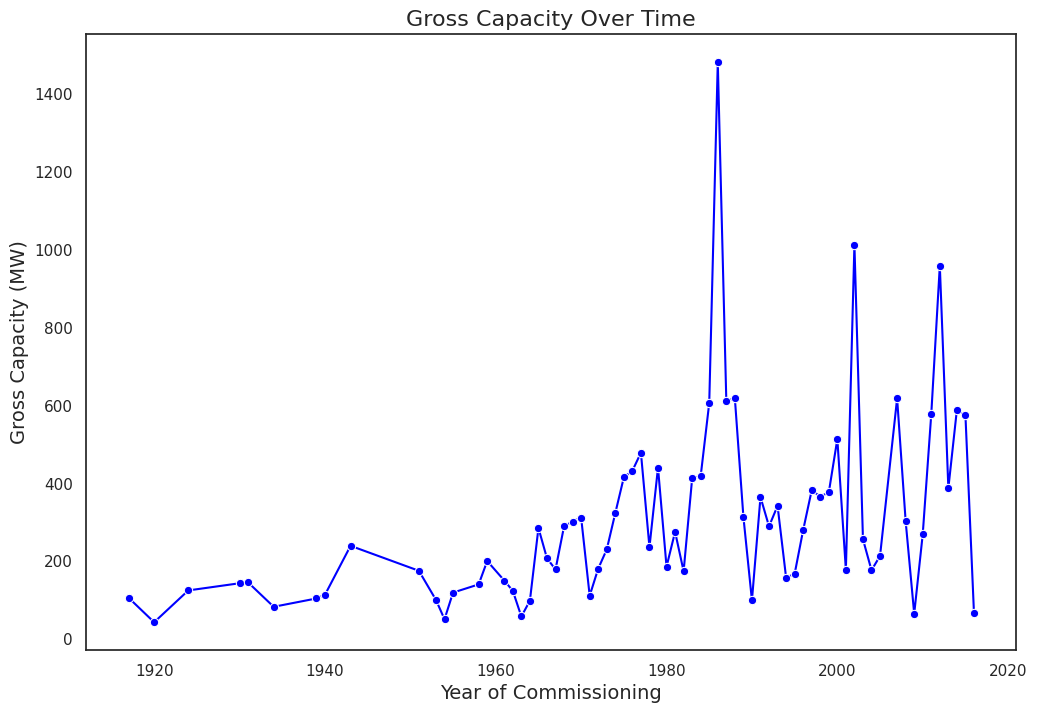

In [146]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='commissioned', y='capacity_gross_uba', data=de_df, marker='o', color='blue', ci=None)
plt.title('Gross Capacity Over Time', fontsize=16)
plt.xlabel('Year of Commissioning', fontsize=14)
plt.ylabel('Gross Capacity (MW)', fontsize=14)
plt.show()

In [150]:
# Remove NaN values in the 'capacity_gross_uba' column
de_df_clean = de_df.dropna(subset=['capacity_gross_uba'])

# Group by year and calculate the maximum capacity value
max_capacity_per_year = de_df_clean.groupby('commissioned')['capacity_gross_uba'].max().reset_index()

# Rename the columns for better readability
max_capacity_per_year.columns = ['Year', 'Max Gross Capacity (MW)']

pd.set_option('display.max_rows', None)  # This allows displaying all rows without truncation
print(max_capacity_per_year)


      Year  Max Gross Capacity (MW)
0   1917.0                107.00000
1   1920.0                 44.00000
2   1924.0                125.60000
3   1930.0                144.00000
4   1931.0                147.30000
5   1934.0                 83.64783
6   1939.0                105.00000
7   1940.0                114.25405
8   1943.0                240.00000
9   1951.0                176.00000
10  1953.0                101.30000
11  1954.0                 51.68317
12  1955.0                133.70000
13  1958.0                162.10000
14  1959.0                201.00000
15  1961.0                151.00000
16  1962.0                138.70000
17  1963.0                100.00000
18  1964.0                222.86000
19  1965.0                363.00000
20  1966.0                370.00000
21  1967.0                340.00000
22  1968.0                370.00000
23  1969.0                397.00000
24  1970.0                315.00000
25  1971.0                320.00000
26  1972.0                31

**3. What is the average efficiency of power plants, and how does it vary by technology type?**

<ipython-input-84-bc94ddd9a59a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='technology', y='efficiency_estimate', data=de_df, palette='viridis')


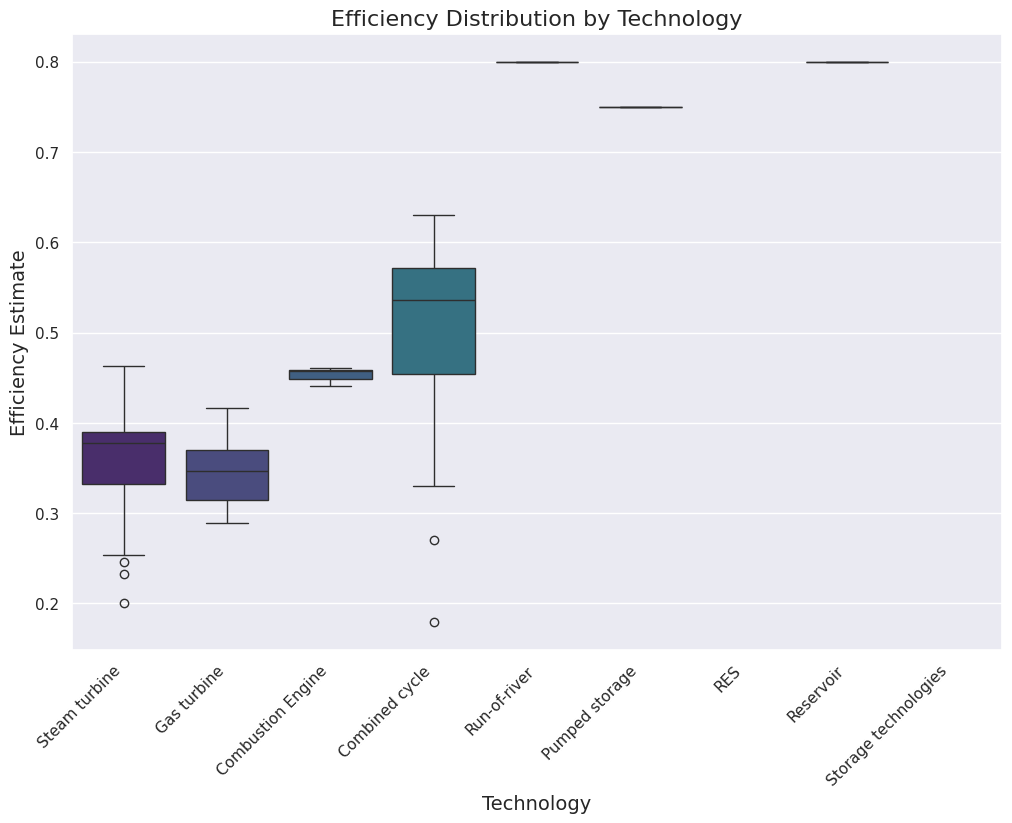

In [84]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='technology', y='efficiency_estimate', data=de_df, palette='viridis')
plt.title('Efficiency Distribution by Technology', fontsize=16)
plt.xlabel('Technology', fontsize=14)
plt.ylabel('Efficiency Estimate', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

**4. Which states in Germany have the highest power generation capacities**

<ipython-input-85-f3bb2b17fb87>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='capacity_net_bnetza', data=de_df, estimator=sum, palette='viridis', order=order)


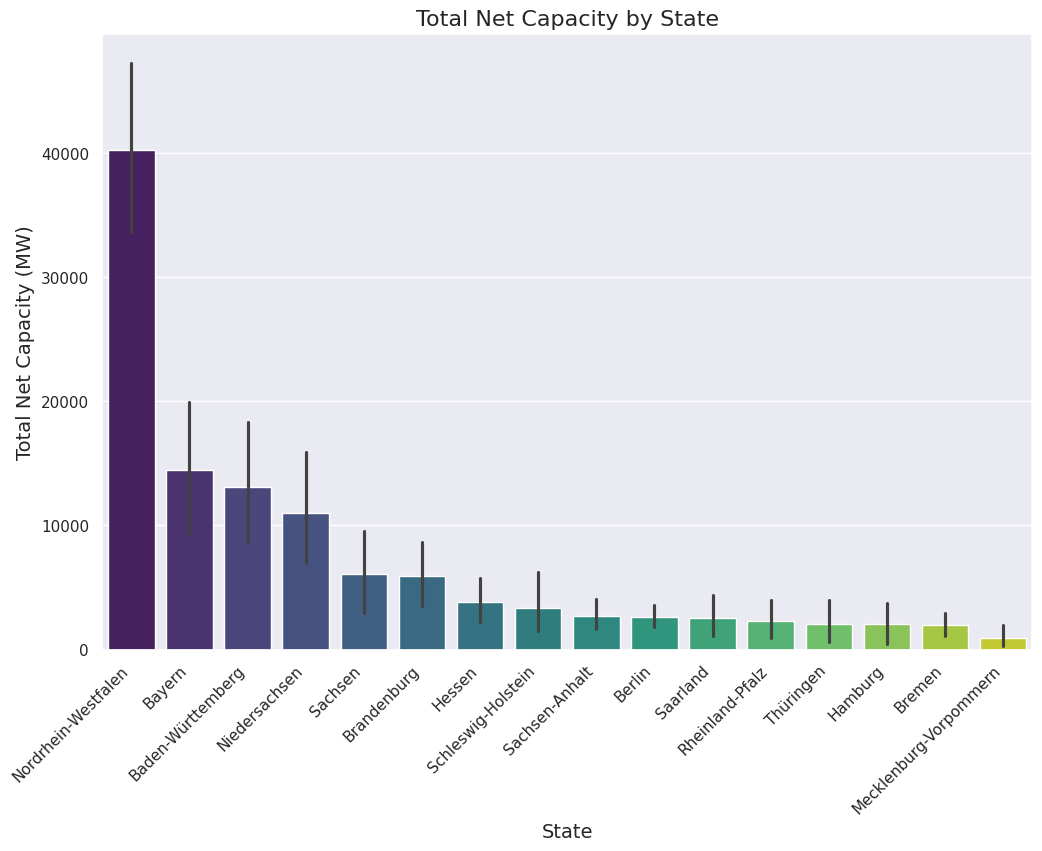

In [85]:
# Calculate the sum of capacity by state
order = de_df.groupby('state')['capacity_net_bnetza'].sum().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
sns.barplot(x='state', y='capacity_net_bnetza', data=de_df, estimator=sum, palette='viridis', order=order)
plt.title('Total Net Capacity by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Net Capacity (MW)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

**5. How does the proportion of plants with cogeneration (CHP) capacity vary by technology type?**

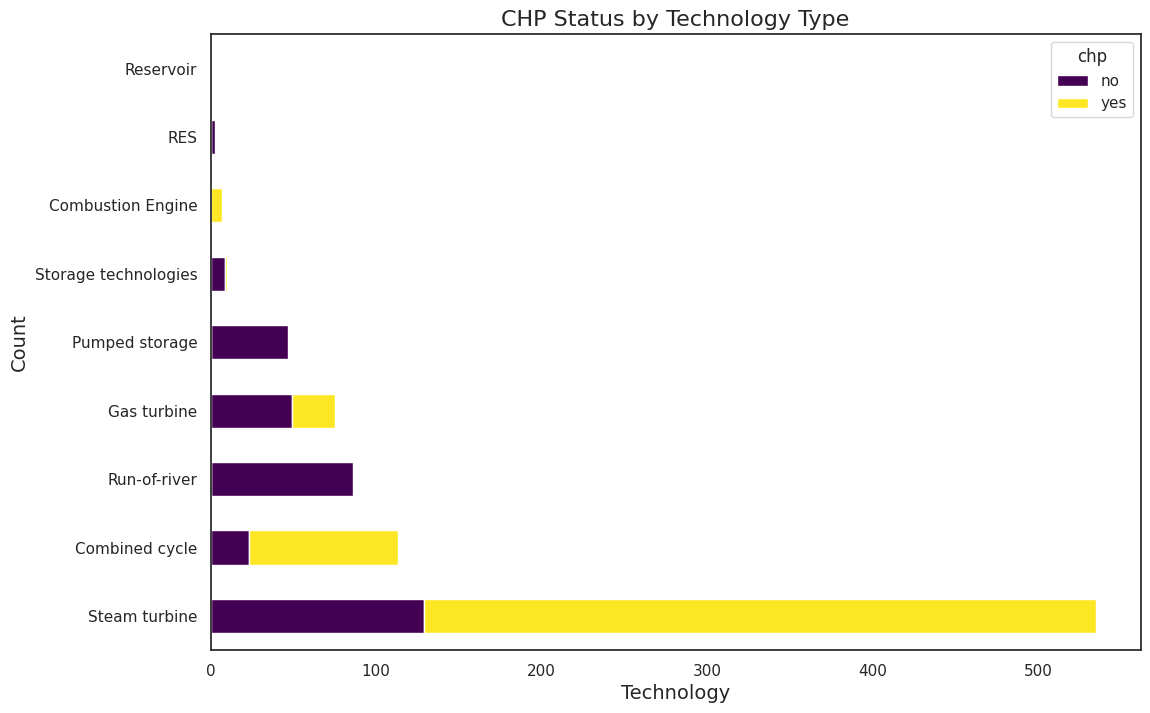

In [131]:
# Group and count the number of CHP by technology
chp_technology_counts = de_df.groupby('technology')['chp'].value_counts().unstack().fillna(0)

# Calculate the total sum of CHP for each technology
chp_totals = chp_technology_counts.sum(axis=1)

# Order technologies based on the total sum of CHP in descending order
ordered_technologies = chp_totals.sort_values(ascending=False).index

# Reorder the chp_technology_counts DataFrame based on the technology order
chp_technology_counts = chp_technology_counts.loc[ordered_technologies]

# Plot the chart
chp_technology_counts.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('CHP Status by Technology Type', fontsize=16)
plt.xlabel('Technology', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

**6. Geographical distribution of power plants by energy source type**

In [90]:
pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 43.3 MB/s eta 0:00:00


In [91]:
import geopandas as gpd
import contextily as ctx

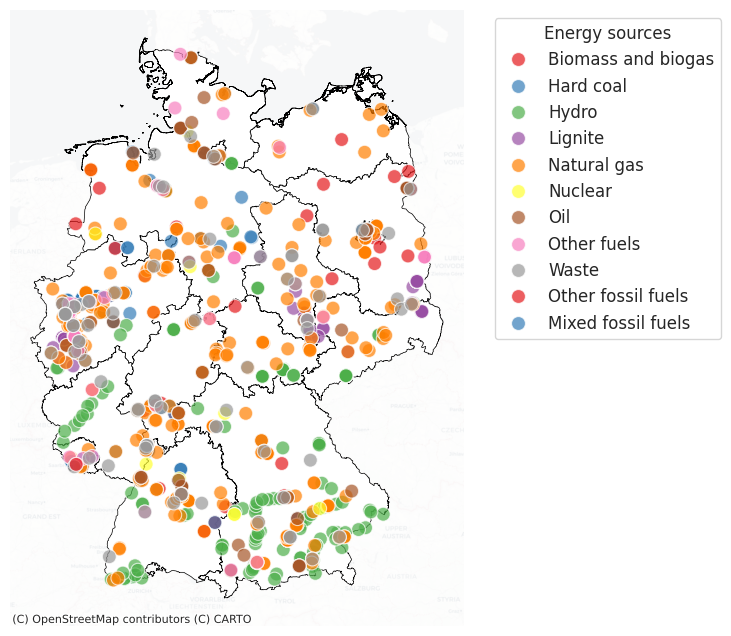

In [132]:
# Load the shapefile for Germany (replace with the path to your shapefile)
gdf_de = gpd.read_file('/content/gadm41_DEU_1.shp')

# Convert the `de_df` data into a GeoDataFrame
gdf_usinas = gpd.GeoDataFrame(
    de_df,
    geometry=gpd.points_from_xy(de_df.lon, de_df.lat),
    crs='EPSG:4326'  # Geographic coordinates
)

# Reproject to the appropriate coordinate system for the context
gdf_usinas = gdf_usinas.to_crs(epsg=3857)  # Reproject to Web Mercator

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the shapefile of Germany with a minimalist style
gdf_de.to_crs(epsg=3857).plot(ax=ax, color='white', edgecolor='black', linewidth=0.5)

# Plot the power plants
sns.scatterplot(data=gdf_usinas, x=gdf_usinas.geometry.x, y=gdf_usinas.geometry.y, hue='energy_source', palette='Set1', alpha=0.7, ax=ax, s=100)

# Add a background map with `contextily`
ctx.add_basemap(ax, crs=gdf_usinas.crs, source=ctx.providers.CartoDB.Positron, alpha=0.2)

# Remove axes and grid lines
ax.set_axis_off()

# Add simplified title and labels
plt.title('', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Add a discrete legend
plt.legend(title='Energy sources', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.show()

**7. Total installed capacity of renewable sources**

In [94]:
# Define the classification of energy sources
energy_classification = {
    'Biomass and biogas': 'Renewable',
    'Hard coal': 'Non-renewable',
    'Hydro': 'Renewable',
    'Lignite': 'Non-renewable',
    'Natural gas': 'Non-renewable',
    'Nuclear': 'Non-renewable',
    'Oil': 'Non-renewable',
    'Other fuels': 'Non-renewable',
    'Waste': 'Renewable',
    'Other fossil fuels': 'Non-renewable',
    'Mixed fossil fuels': 'Non-renewable'
}

# Add a new column to the DataFrame for the category
de_df['category'] = de_df['energy_source'].map(energy_classification)


In [95]:
print(de_df.columns)

Index(['id', 'name_bnetza', 'block_bnetza', 'name_uba', 'company', 'street',
       'postcode', 'city', 'state', 'country', 'capacity_net_bnetza',
       'capacity_gross_uba', 'energy_source', 'technology', 'chp',
       'chp_capacity_uba', 'commissioned', 'commissioned_original', 'retrofit',
       'shutdown', 'status', 'type', 'lat', 'lon', 'eic_code_plant',
       'eic_code_block', 'efficiency_data', 'efficiency_source',
       'efficiency_estimate', 'energy_source_level_1', 'energy_source_level_2',
       'energy_source_level_3', 'eeg', 'network_node', 'voltage',
       'network_operator', 'merge_comment', 'comment', 'age', 'category'],
      dtype='object')


In [96]:
# Group by the category and sum the capacity
capacity_by_category_net_bnetza = de_df.groupby('category')['capacity_net_bnetza'].sum().reset_index()

# Display the result
print(capacity_by_category_net_bnetza)

        category  capacity_net_bnetza
0  Non-renewable          103776.2215
1      Renewable           11355.8434


<ipython-input-102-644f08cdf3e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=capacity_by_category_net_bnetza, x='category', y='capacity_net_bnetza', palette='viridis')


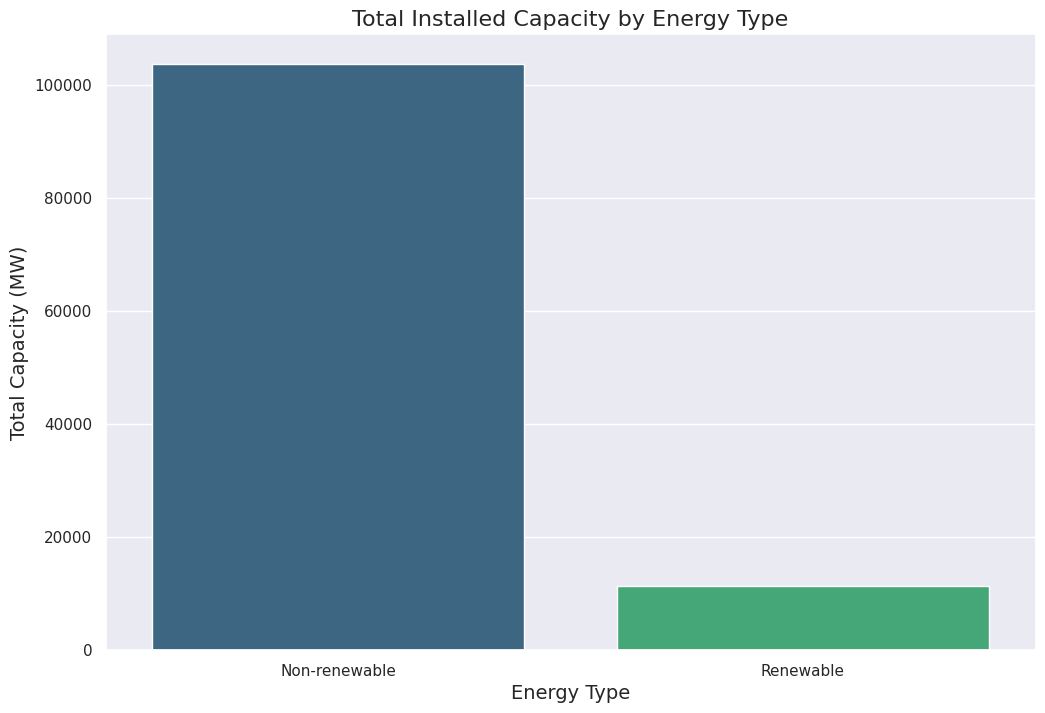

In [102]:
# Plotting the results
plt.figure(figsize=(12, 8))
sns.barplot(data=capacity_by_category_net_bnetza, x='category', y='capacity_net_bnetza', palette='viridis')
plt.title('Total Installed Capacity by Energy Type', fontsize=16)
plt.xlabel('Energy Type', fontsize=14)
plt.ylabel('Total Capacity (MW)', fontsize=14)
plt.xticks(ha='center')
plt.show()

**8. Relationship between Installed Capacity and Number of Plants by Energy Type**

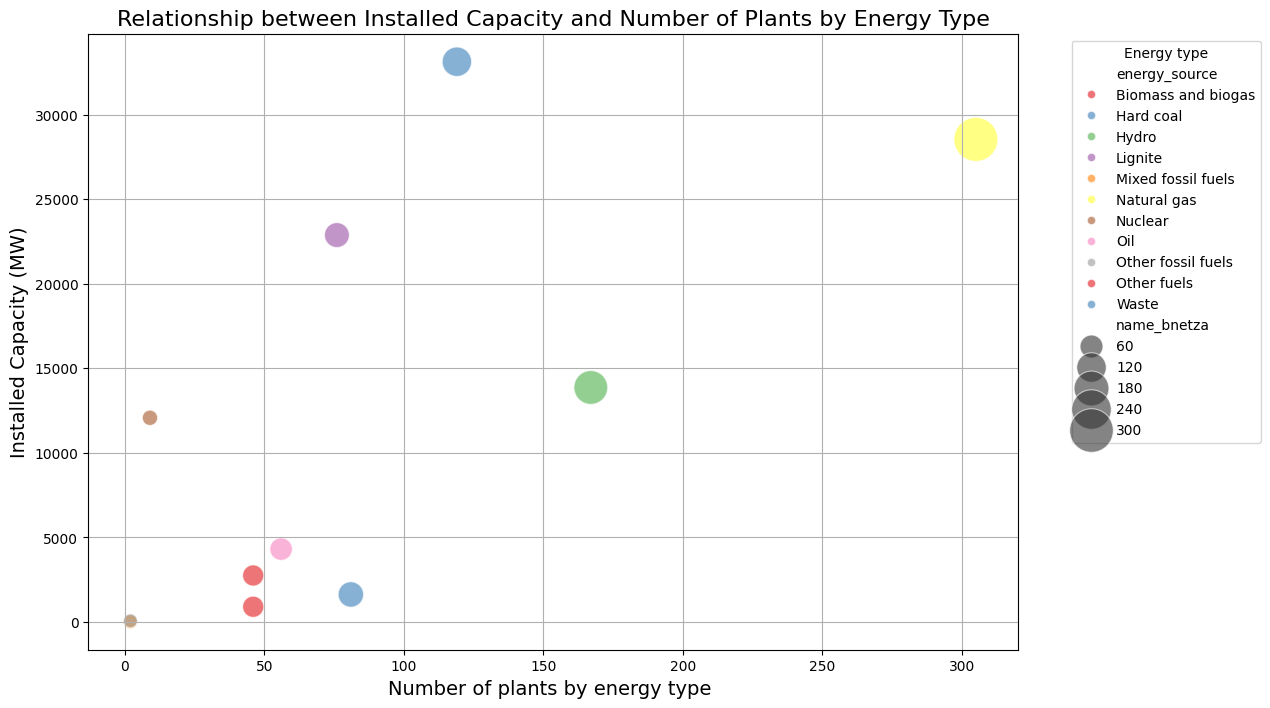

In [4]:
# Group and sum capacity, and count the number of power plants by energy type
capacity_and_count = de_df.groupby('energy_source').agg({'capacity_net_bnetza': 'sum', 'name_bnetza': 'count'}).reset_index()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=capacity_and_count, x='name_bnetza', y='capacity_net_bnetza', hue='energy_source', palette='Set1', size='name_bnetza', sizes=(100, 1000), alpha=0.6)
plt.title('Relationship between Installed Capacity and Number of Plants by Energy Type', fontsize=16)
plt.xlabel('Number of plants by energy type ', fontsize=14)
plt.ylabel('Installed Capacity (MW)', fontsize=14)
plt.legend(title='Energy type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
!pip install requests
